In [1]:
import parselmouth

In [2]:
def extract_info(sound):
    pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
    intensity = sound.to_intensity(75, 0.001, subtract_mean=False)

    print("Here are the results:")
    for i in range(int((sound.tmax - sound.tmin) / 0.01)):
        time = sound.tmin + (i + 1) * 0.01
        p_value = pitch.get_value_at_time(time)
        i_value = intensity.get_value(time)
        print("{:.2f} {:.3f} {:.3f}".format(time, p_value, i_value))



In [3]:
seal_call = parselmouth.Sound("data/Series_Mojito.wav")

In [4]:
print(seal_call)

Object type: Sound
Object name: <no name>
Date: Tue Jul  5 12:55:58 2022

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 7.5710625 seconds
   Total duration: 7.5710625 seconds
Time sampling:
   Number of samples: 363411
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.533660889 Pascal
   Maximum: 0.455383301 Pascal
   Mean: -1.21028682e-05 Pascal
   Root-mean-square: 0.0826060632 Pascal
Total energy: 0.0516631262 Pascal² sec (energy in air: 0.000129157815 Joule/m²)
Mean power (intensity) in air: 1.70594042e-05 Watt/m² = 72.32 dB
Standard deviation in channel 1: 0.082606176 Pascal



In [5]:
from IPython.display import Audio

Audio(seal_call.values, rate=seal_call.sampling_frequency)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

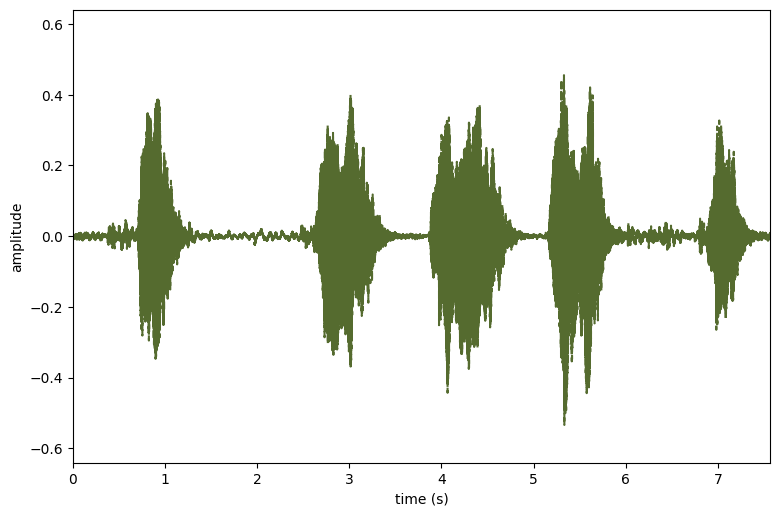

In [7]:
def plot_waveform(ax, sound, **kwargs):
    max_abs_val = np.max(np.abs(sound.values))
    ax.plot(sound.xs(), sound.values[0,:], **kwargs)
    ax.set_xlim(sound.xmin, sound.xmax)
    ax.set_ylim(-1.2 * max_abs_val, 1.2 * max_abs_val)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("amplitude")

fig, ax = plt.subplots()
plot_waveform(ax, seal_call, linestyle='--', color='darkolivegreen')

In [8]:
spectrogram = seal_call.to_spectrogram(window_length=0.03)
spectrogram

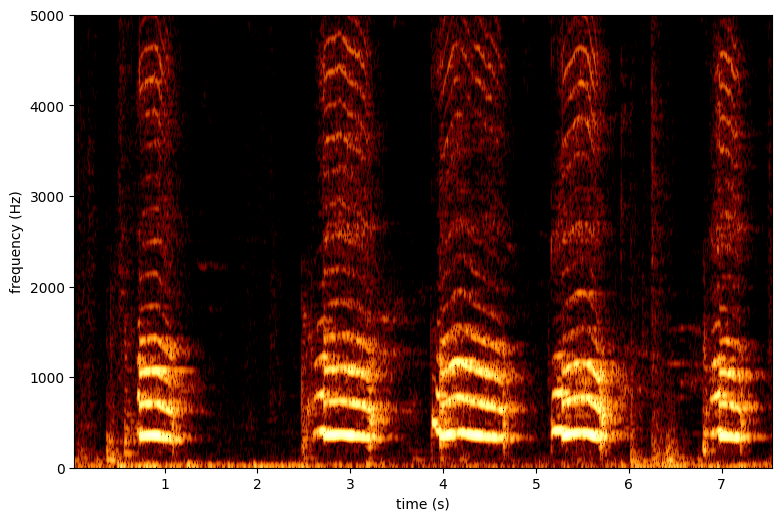

In [9]:
def draw_spectrogram(ax, spectrogram, dynamic_range=70, cmap='afmhot'):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    ax.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap=cmap)
    ax.set_ylim(spectrogram.ymin, spectrogram.ymax)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("frequency (Hz)")
    
fig, ax = plt.subplots()
draw_spectrogram(ax, spectrogram)

In [10]:
first_call = seal_call.extract_part(from_time=2., to_time=4., preserve_times=True)


In [11]:
spectrogram = first_call.to_spectrogram(window_length=0.03)
spectrogram

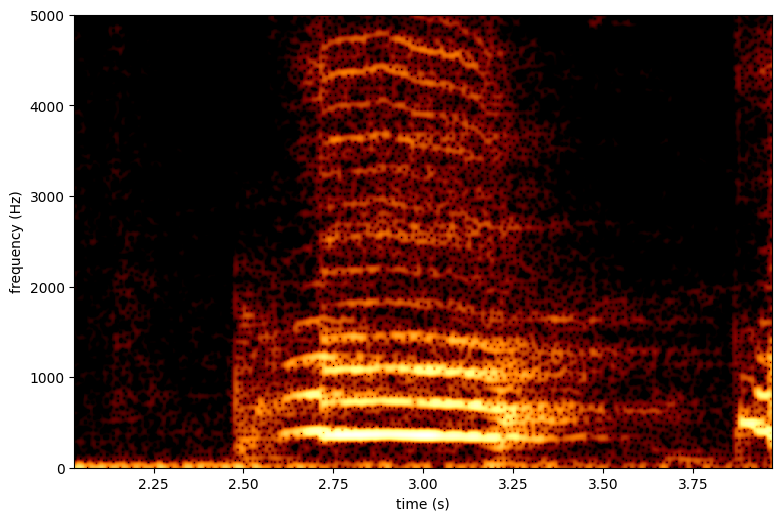

In [12]:
fig, ax = plt.subplots()
draw_spectrogram(ax, spectrogram)

In [13]:
def draw_pitch(ax, pitch):
    # Extract selected pitch contour, and replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    ax.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    ax.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    ax.grid(False)
    ax.set_ylim(0, pitch.ceiling)
    ax.set_ylabel("fundamental frequency (Hz)")

In [14]:
pitch = first_call.to_pitch(pitch_ceiling=300)

(2.0, 4.0)

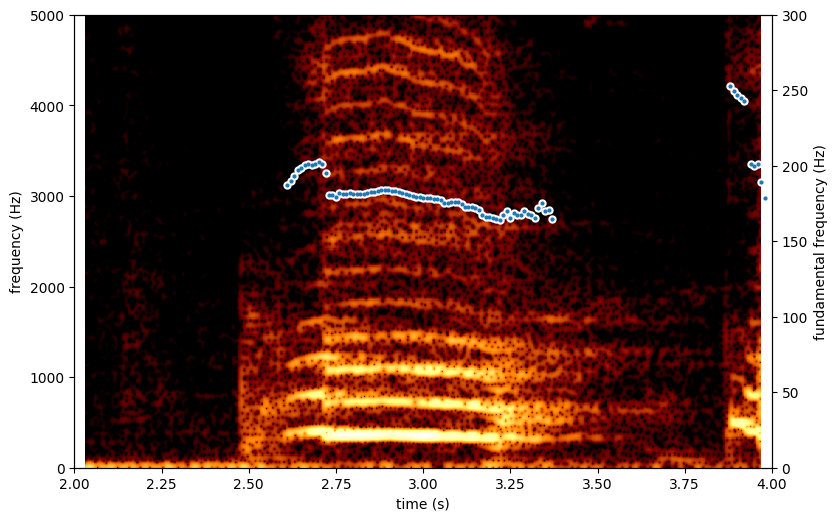

In [15]:
fig, ax = plt.subplots()
draw_spectrogram(ax, spectrogram)
ax_twin = ax.twinx()
draw_pitch(ax_twin, pitch)
ax.set_xlim(first_call.xmin, first_call.xmax)

In [16]:
pitch.get_time_step()

0.01

In [17]:
pitch_values = pitch.selected_array['frequency']
pitch_values[1]

0.0

In [20]:
mfcc = seal_call.to_mfcc()

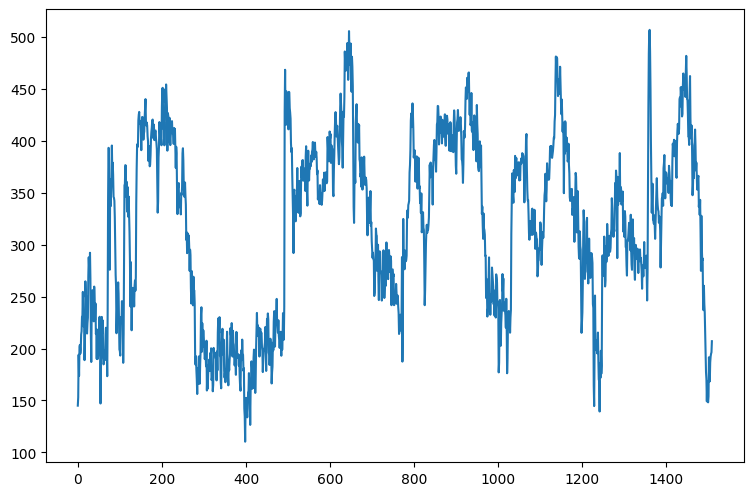

In [23]:
plt.plot(mfcc.to_array()[1])

In [27]:
list(range(1,9))

[1, 2, 3, 4, 5, 6, 7, 8]